package import

In [1]:
from tokenizers import Tokenizer, models, pre_tokenizers, trainers
from tokenizers.pre_tokenizers import Split

from transformers import PreTrainedTokenizerFast, AutoTokenizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/prabakaran/miniconda3/envs/Analysis_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.QED import qed
from rdkit.Chem.Crippen import MolLogP

IPythonConsole.ipython_useSVG=True 

In [3]:
import sys
from io import StringIO

A function used later

# TOKENS frequency

**Loading tokenizers**

In [4]:
tokenizer_guacamol = AutoTokenizer.from_pretrained("../data/tokenizersBEP/guacamol_canonical")
tokenizer_moses = AutoTokenizer.from_pretrained("../data/tokenizersBEP/moses_canonical")
tokenizer_clearSMILES = AutoTokenizer.from_pretrained("../data/tokenizersBEP/moses_ClearSMILES")

**Loading datasets**

In [5]:
dataset_moses  = pd.read_csv("../data/data_tokenizer/moses_canonical.csv")
dataset_guacamol  = pd.read_csv("../data/data_tokenizer/guacamol_canonical.csv")
dataset_clearSMILES  = pd.read_csv("../data/data_tokenizer/moses_ClearSMILES.csv")

In [11]:
max(dataset_moses["SMILES"].apply(len))

57

In [6]:
def isasmiles(smi):
    return isinstance(smi,str)

In [7]:
dataset_guacamol["valid"] = dataset_guacamol["SMILES"].apply(isasmiles)

In [8]:
len(dataset_guacamol[dataset_guacamol["valid"]==True]["SMILES"])

1591378

In [12]:
smiles_moses = [i for i in dataset_moses["SMILES"] if isinstance(i,str)]
smiles_guacamol = [i for i in dataset_guacamol["SMILES"] if isinstance(i,str)]
smiles_clearSMILES =  [i for i in dataset_clearSMILES["SMILES"] if isinstance(i,str)] 


In [30]:
smiles_moses

['CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1',
 'CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1',
 'CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1',
 'Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO',
 'Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C',
 'CC1Oc2ccc(Cl)cc2N(CC(O)CO)C1=O',
 'O=C(C1CCCCC1)N1CC(=O)N2CCCc3ccccc3C2C1',
 'CCOC(=O)c1cncn1C1CCCc2ccccc21',
 'COc1ccccc1OC(=O)c1ccccc1OC(C)=O',
 'COc1ccccc1OC(=O)Oc1ccccc1OC',
 'O=C1Nc2ccc(Cl)cc2C(c2ccccc2Cl)=NC1O',
 'CN1C(=O)C(O)N=C(c2ccccc2Cl)c2cc(Cl)ccc21',
 'CCC(=O)c1ccc(OCC(O)CO)c(OC)c1',
 'Cc1nc2c([nH]1)c(=O)n(C)c(=O)n2CC1CC=CCC1',
 'COc1cc2c(cc1O)N=CC1CCC(O)N1C2=O',
 'COc1c(C)cnc(CS(=O)c2nc3ccccc3[nH]2)c1C',
 'COc1cc(C)c(Cc2cnc(N)nc2N)cc1OC',
 'O=C1Nc2ccc(Cl)cc2C(c2ccccc2)=NC1O',
 'CC1CC(OC(=O)CN2CCCC2=O)CC(C)(C)C1',
 'COc1ccc(OC)c(Cc2cnc3nc(N)nc(N)c3c2C)c1',
 'O=C(C1CCCCC1)N1CC(=O)N2CCc3ccccc3C2C1',
 'COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O',
 'CCC1NC(=O)c2cc(S(N)(=O)=O)c(Cl)cc2N1',
 'CN1C(=O)C(O)N=C(c2ccccc2)c2cc(Cl)ccc21',
 'CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1',
 'COc

**Get tokens and tokens ids**

In [8]:
#tokens_guacamol = [tokenizer_guacamol.tokenize(i) for i in smiles_guacamol]

#tokens_moses = [tokenizer_moses.tokenize(i) for i in smiles_moses]



In [13]:
token_ids_guacamol = [tokenizer_guacamol.encode(i) for i in smiles_guacamol]
token_ids_moses = [tokenizer_moses.encode(i) for i in smiles_moses]
token_ids_clearSmiles = [tokenizer_clearSMILES.encode(i) for i in smiles_clearSMILES]

In [35]:
token_ids_clearSmiles

[[0, 1221, 292, 2360, 1],
 [0, 8280, 1044, 1],
 [0, 1495, 187, 1044, 1],
 [0, 1674, 187, 1044, 1],
 [0, 7978, 1044, 1],
 [0, 1407, 187, 1044, 1],
 [0, 1221, 292, 1196, 1],
 [0, 1109, 2122, 1648, 1],
 [0, 5871, 1837, 1],
 [0, 1994, 9941, 1],
 [0, 1994, 6523, 1],
 [0, 1598, 3122, 392, 1],
 [0, 7545, 1837, 1],
 [0, 1740, 187, 1837, 1],
 [0, 2335, 187, 1837, 1],
 [0, 1598, 3122, 413, 1],
 [0, 1756, 3122, 409, 1],
 [0, 91, 2122, 1648, 1],
 [0, 2618, 292, 1610, 1],
 [0, 875, 187, 1757, 1],
 [0, 7095, 1848, 1],
 [0, 2041, 7020, 1],
 [0, 1464, 2122, 1788, 1],
 [0, 1740, 187, 1848, 1],
 [0, 298, 2122, 1648, 1],
 [0, 2041, 4459, 429, 1],
 [0, 369, 2748, 1757, 1],
 [0, 1756, 3122, 333, 1],
 [0, 3689, 187, 1848, 1],
 [0, 1412, 187, 1757, 1],
 [0, 2041, 292, 845, 1],
 [0, 834, 2122, 1788, 1],
 [0, 1495, 187, 1757, 1],
 [0, 480, 2122, 1648, 1],
 [0, 7978, 1848, 1],
 [0, 1624, 292, 2210, 1],
 [0, 469, 292, 716, 1],
 [0, 469, 292, 640, 1],
 [0, 605, 2122, 1648, 1],
 [0, 1598, 3122, 236, 1],
 [0, 469, 

**Count tokens occurence/frequency**

In [14]:
count_tokens_guacamol = [0] * len(tokenizer_guacamol)
count_tokens_moses = [0] * len(tokenizer_moses)
count_tokens_clearSmiles = [0] * len(tokenizer_clearSMILES)

for ids in token_ids_guacamol :
    for id in ids:
        count_tokens_guacamol[id]+=1


for ids in token_ids_moses :
    for id in ids:
        count_tokens_moses[id]+=1

for ids in token_ids_clearSmiles :
    for id in ids:
        count_tokens_clearSmiles[id]+=1

<BarContainer object of 10000 artists>

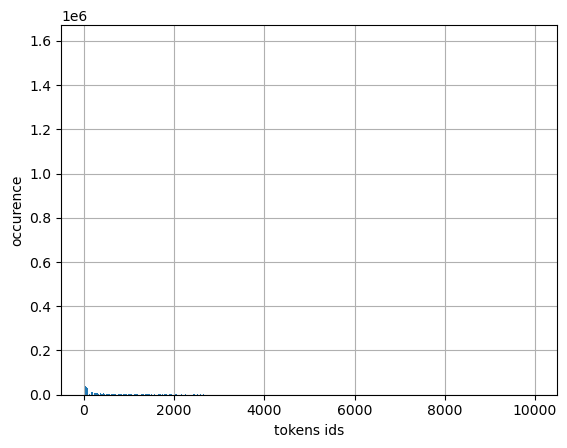

In [15]:
plt.grid()
plt.xlabel("tokens ids")
plt.ylabel("occurence")
plt.bar([i for i in range(len(count_tokens_guacamol))],count_tokens_guacamol)



<BarContainer object of 10000 artists>

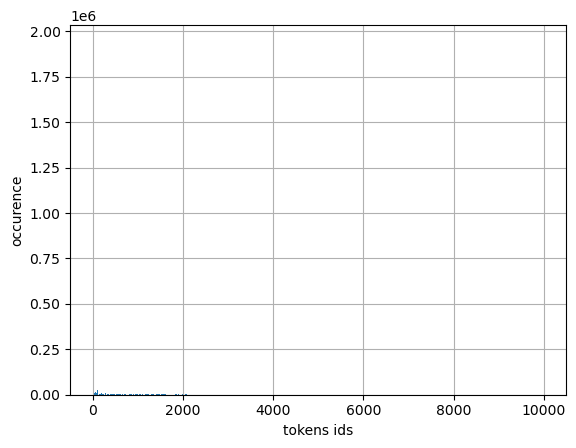

In [17]:
plt.xlabel("tokens ids")
plt.ylabel("occurence")
plt.grid()
plt.bar([i for i in range(len(count_tokens_moses))],count_tokens_moses)


<BarContainer object of 10000 artists>

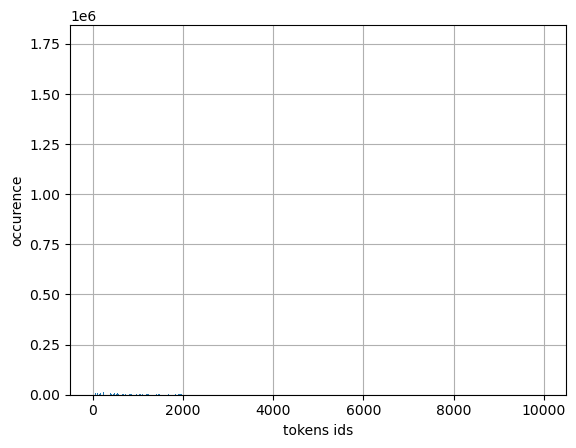

In [18]:
plt.xlabel("tokens ids")
plt.ylabel("occurence")
plt.grid()
plt.bar([i for i in range(len(count_tokens_clearSmiles))],count_tokens_clearSmiles)


Those figures are coherent with what we want in BPE tokenizers' vocabulary, the generation of both of the vocabulary looks good in term of frequency. 

Most frequent tokens

In [16]:
ids_max_guacamol = np.argmax(count_tokens_guacamol)
ids_max_moses = np.argmax(count_tokens_moses)
ids_max_clearSmiles = np.argmax(count_tokens_clearSmiles)

print(ids_max_moses,ids_max_guacamol,ids_max_clearSmiles)

print(tokenizer_guacamol.decode(ids_max_guacamol), tokenizer_moses.decode(ids_max_moses),tokenizer_clearSMILES.decode(ids_max_clearSmiles))

0 0 0
<bos> <bos> <bos>


**Analysis of tokens validity**

We need to have access of the vocabulary using their keys in the tokenizers encoding. 

In [17]:
moses_vocab = [""] * len(tokenizer_moses)
vocab_dict =tokenizer_moses.get_vocab() 
for i in vocab_dict.keys() :
    
    moses_vocab[vocab_dict[i]] = i


guacamol_vocab = [""] * len(tokenizer_guacamol)
vocab_dict =tokenizer_guacamol.get_vocab() 
for i in vocab_dict.keys() :
    
    guacamol_vocab[vocab_dict[i]] = i


clearSmiles_vocab = [""] * len(tokenizer_clearSMILES)
vocab_dict =tokenizer_clearSMILES.get_vocab() 
for i in vocab_dict.keys() :
    
    clearSmiles_vocab[vocab_dict[i]] = i



First, we parse the vocabulary by checking for each word if they have a mol representation with Chem.MolFromSmiles(..)

In [18]:

error_dict={
'marked aromatic' : 'aromaticity',
'Unkekulized atoms' : 'aromaticity',
'syntax error' : 'syntax',
'duplicates bond' : 'ring',
'duplicated ring closure' : 'ring',
'unclosed ring': 'ring',
'extra close parentheses': 'parenthesis',
'extra open parentheses' : 'parenthesis',
'Explicit valence' : 'valence'
}

def error_log_classification(samples : str,error_dict : dict[str,str])-> str:
    """
    This function will take a SMILES that has already been checked for validity and will retrieve the error type.
    Args:
    samples (str): a SMILES string to be checked
    error_dict (dict): a dictionary containing the keywords and their corresponding error types
    Returns:
    error_type (str): the type of error found in the SMILES string
    """
    ### declare local variable
    error_type= "unknown"

    ### redirect error log
    sio = sys.stderr = StringIO()

    ### generate mol
    mol= Chem.MolFromSmiles(samples)

    ### chek if an error happened
    error_log =sio.getvalue()
    
    
    ### iterate through keywords to find error type
    for keyword in error_dict:
        if keyword in error_log:
            error_type= error_dict[keyword]
            
            break

    return error_type,mol

In [19]:
mol = Chem.MolFromSmiles('CC(C')


[16:22:55] SMILES Parse Error: extra open parentheses while parsing: CC(C
[16:22:55] SMILES Parse Error: check for mistakes around position 3:
[16:22:55] CC(C
[16:22:55] ~~^
[16:22:55] SMILES Parse Error: Failed parsing SMILES 'CC(C' for input: 'CC(C'


In [20]:
#pour chaque token, le mol associé
mol_from_moses = []
mol_from_guacamol = []
mol_from_clearSmiles = []
#pour chaque token, l'erreur associée
error_vocab_moses = []
error_vocab_guacamol = []
error_vocab_clearSmiles = []

for i in moses_vocab:
    error,mol = error_log_classification(i,error_dict=error_dict)
    mol_from_moses.append(mol)
    error_vocab_moses.append(error)

for i in guacamol_vocab:
    error,mol = error_log_classification(i,error_dict=error_dict)
    mol_from_guacamol.append(mol)
    error_vocab_guacamol.append(error)

for i in clearSmiles_vocab:
    error,mol = error_log_classification(i,error_dict=error_dict)
    mol_from_clearSmiles.append(mol)
    error_vocab_clearSmiles.append(error)


In [21]:

data_on_moses_vocab = pd.DataFrame()
data_on_guacamol_vocab = pd.DataFrame()
data_on_clearSmiles_vocab = pd.DataFrame()


data_on_moses_vocab["SMILES"] = moses_vocab
data_on_moses_vocab["mol"] = mol_from_moses 
data_on_moses_vocab["error type if not mol"] = error_vocab_moses 


data_on_guacamol_vocab["SMILES"] = guacamol_vocab
data_on_guacamol_vocab["mol"] = mol_from_guacamol
data_on_guacamol_vocab["error type if not mol"] = error_vocab_guacamol

data_on_clearSmiles_vocab["SMILES"] = clearSmiles_vocab
data_on_clearSmiles_vocab["mol"] = mol_from_clearSmiles
data_on_clearSmiles_vocab["error type if not mol"] = error_vocab_clearSmiles


In [22]:
error_type_guacamol = data_on_guacamol_vocab["error type if not mol"].unique()
error_type_moses = data_on_moses_vocab["error type if not mol"].unique()
error_type_clearSmiles = data_on_clearSmiles_vocab["error type if not mol"].unique()

In [23]:
error_count_moses = [data_on_moses_vocab[data_on_moses_vocab["error type if not mol"] == k ]["error type if not mol"].count() for k in error_type_moses ]
error_count_guacamol = [data_on_guacamol_vocab[data_on_guacamol_vocab["error type if not mol"] == k ]["error type if not mol"].count() for k in error_type_guacamol]
error_count_clearSmiles = [data_on_clearSmiles_vocab[data_on_clearSmiles_vocab["error type if not mol"] == k ]["error type if not mol"].count() for k in error_type_clearSmiles]

MOSES error type vocabulary

<BarContainer object of 5 artists>

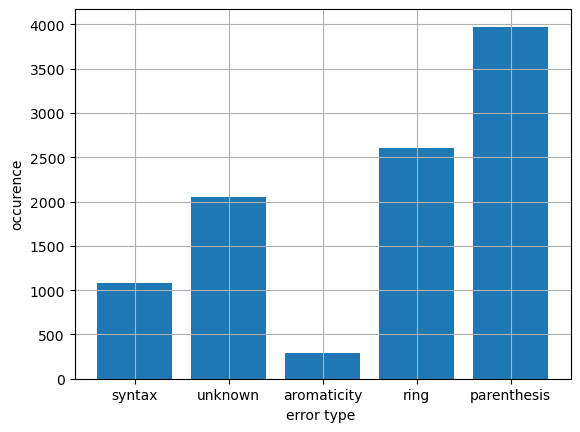

In [24]:
plt.xlabel("error type ")
plt.ylabel("occurence")
plt.grid()
plt.bar(error_type_moses,error_count_moses)

In [25]:
n_moses = error_count_moses[1] # attention pas robuste, en gros je regarde les error type unknown, car c'est la valeur par défaut de nos erreurs au dessus donc la valeur du vocab sans faute .  
print(f"how many are not valid mols : {len(tokenizer_moses) - n_moses}")
print(f"rate of no valid mols : {(len(tokenizer_moses) - n_moses)/len(tokenizer_moses)}")

how many are not valid mols : 7946
rate of no valid mols : 0.7946


Guacamol error type vocabulary

<BarContainer object of 5 artists>

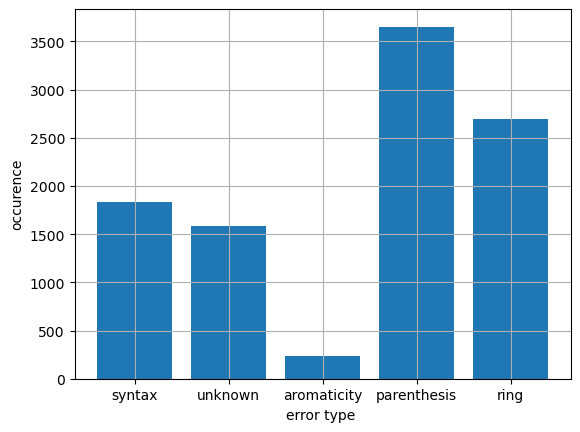

In [26]:
plt.xlabel("error type ")
plt.ylabel("occurence")
plt.grid()
plt.bar(error_type_guacamol,error_count_guacamol)

In [27]:
n_guacamol = error_count_guacamol[1] # attention pas robuste, en gros je regarde les error type unknown, car c'est la valeur par défaut de nos erreurs au dessus donc la valeur du vocab sans faute .  
print(f"how many are not valid mols : {len(tokenizer_guacamol) - n_guacamol}")
print(f"rate of no valid mols : {(len(tokenizer_guacamol) - n_guacamol)/len(tokenizer_guacamol)}")

how many are not valid mols : 8414
rate of no valid mols : 0.8414


ClearSmiles error type 

<BarContainer object of 6 artists>

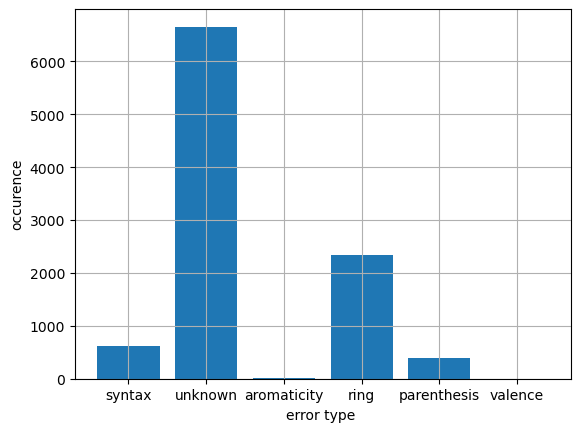

In [28]:
plt.xlabel("error type ")
plt.ylabel("occurence")
plt.grid()
plt.bar(error_type_clearSmiles,error_count_clearSmiles)

In [29]:
n_clearSmiles = error_count_clearSmiles[1] # attention pas robuste, en gros je regarde les error type unknown, car c'est la valeur par défaut de nos erreurs au dessus donc la valeur du vocab sans faute .  
print(f"how many are not valid mols : {len(tokenizer_clearSMILES) - n_clearSmiles}")
print(f"rate of no valid mols : {(len(tokenizer_clearSMILES) - n_clearSmiles)/len(tokenizer_clearSMILES)}")

how many are not valid mols : 3343
rate of no valid mols : 0.3343


Among valid mols in vocabularies, let's look their quantitative drug-likeness

Need to define a auxiliar function because qed(None) is not define

In [31]:
def qed_bis(mol):
    if mol:
        return qed(mol)
    return 0


In [26]:
data_on_moses_vocab["qed"] = data_on_moses_vocab["mol"].apply(qed_bis)

data_on_guacamol_vocab["qed"] = data_on_guacamol_vocab["mol"].apply(qed_bis)


In [27]:
print(f"the number of valid mol in guacamol tokenisers' vocab is : {int(data_on_guacamol_vocab[data_on_guacamol_vocab["qed"] != 0]["qed"].count()) }")

print(f"the number of valid mol in moses tokenisers' vocab is : {int(data_on_moses_vocab[data_on_moses_vocab["qed"] != 0]["qed"].count()) }")



the number of valid mol in guacamol tokenisers' vocab is : 1586
the number of valid mol in moses tokenisers' vocab is : 2053


In [28]:
data_on_moses_vocab[data_on_moses_vocab["qed"] != 0]["qed"]

8       0.339424
29      0.287938
30      0.359785
31      0.350795
33      0.419127
          ...   
9985    0.648269
9992    0.531625
9994    0.471839
9995    0.460802
9997    0.539215
Name: qed, Length: 2053, dtype: float64

In [29]:
print(f"mean qed for valid mol in guacamol tokenisers' vocab is : {float(data_on_guacamol_vocab[data_on_guacamol_vocab["qed"] != 0]["qed"].mean())}")
print(f"mean qed for valid mol in moses tokenisers' vocab is : {float(data_on_moses_vocab[data_on_moses_vocab["qed"] != 0]["qed"].mean())}")

mean qed for valid mol in guacamol tokenisers' vocab is : 0.4757971047862081
mean qed for valid mol in moses tokenisers' vocab is : 0.5230902996020343


In [30]:
print(f"variance of qed for valid mol in guacamol tokenisers' vocab is : {float(data_on_guacamol_vocab[data_on_guacamol_vocab["qed"] != 0]["qed"].var())}")
print(f"variance of qed for valid mol in moses tokenisers' vocab is : {float(data_on_moses_vocab[data_on_moses_vocab["qed"] != 0]["qed"].var())}")

variance of qed for valid mol in guacamol tokenisers' vocab is : 0.01010400641568083
variance of qed for valid mol in moses tokenisers' vocab is : 0.008226698336347286


In [31]:
smile = 'CC'
mol = Chem.MolFromSmiles(smile)

MolLogP(mol)



1.0262

COMPARISON OF TOKENS LIST LENGTH WHEN A WORD IS TOKENIZED AND THE WORD LENGTH TO SEE HOW THE INFORMATION IS COMPACTED


In [38]:
tokens_len_moses = [(len(token_ids_moses[j])-2)/len(smiles_moses[j]) for j in range(len(token_ids_moses)) ]
tokens_len_guacamol = [(len(token_ids_guacamol[j])-2)/len(smiles_guacamol[j]) for j in range(len(token_ids_guacamol)) ]
tokens_len_moses_clearsmi = [(len(token_ids_clearSmiles[j])-2)/len(smiles_clearSMILES[j]) for j in range(len(token_ids_clearSmiles)) ]

In [39]:
n = 100

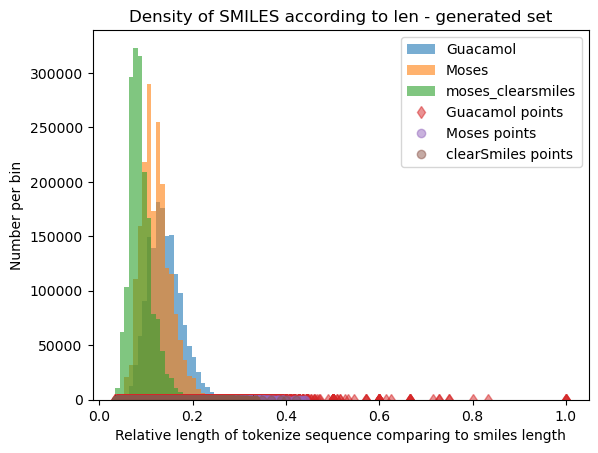

In [ ]:
# Compute bins for both datasets
len_max1 = max(tokens_len_moses)
len_min1 = min(tokens_len_moses)
len_max2 = max(tokens_len_guacamol)
len_min2 = min(tokens_len_guacamol)
len_max3 = max(tokens_len_moses_clearsmi)
len_min3 = min(tokens_len_moses_clearsmi)

len_min = min(min(len_min1, len_min2),len_min3)
len_max = max(max(len_max1,len_max2 ),len_max3)

bin_width = (len_max - len_min) / n
x_bins = [len_min + k * bin_width for k in range(n+1)]

# Create the plot
fig, ax = plt.subplots()

# Plot histograms
ax.hist(tokens_len_guacamol, bins=x_bins, alpha=0.6, label='Guacamol')
ax.hist(tokens_len_moses, bins=x_bins, alpha=0.6, label='Moses')
ax.hist(tokens_len_moses_clearsmi, bins=x_bins, alpha=0.6, label='moses_clearsmiles')

# Optionally: overlay scatter points at y=0 for both datasets
ax.plot(tokens_len_guacamol, [0]*len(tokens_len_guacamol), 'd', label='Guacamol points', alpha=0.5)
ax.plot(tokens_len_moses, [0]*len(tokens_len_moses), 'o', label='Moses points', alpha=0.5)
ax.plot(tokens_len_moses_clearsmi, [0]*len(tokens_len_moses_clearsmi), 'o', label='clearSmiles points', alpha=0.5)


# Labels and title
ax.set_ylabel('Number per bin')
ax.set_xlabel('Relative length of tokenize sequence comparing to smiles length')
ax.set_title('Density of SMILES according to len - training - test set')
ax.legend()

plt.show()